<a href="https://colab.research.google.com/github/Rohit-Saswadkar/Blue-Bash-beer-review-prediction/blob/main/Bluebash_beer_review_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Set display options to show up to 10 rows and 10 columns
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)


In [4]:
path = r'/content/drive/MyDrive/Data Science Advanced Projects/Bluebash beer review prediction/train.csv'

##Initial data exploration

In [5]:
df = pd.read_csv( path)

In [6]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,...,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,...,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,...,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,...,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,...,1.209827e+09,10-Aug-76,208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),...,NaN,NaN,NaN,NaN,Brewbro000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [8]:
df['review/overall'].value_counts()

,count
review/overall,
4.0,13868
4.5,8666
3.5,6551
3.0,3319
5.0,2671
2.5,1193
2.0,807
1.5,248
1.0,176


Heres only 1 row for 0 class, I will solved it by converting to all in the range of 1 to 5 integers in feature engg 2.

In [9]:
for i in df.columns:
  print(i, df[i].nunique())

index 37500
beer/ABV 126
beer/beerId 1731
beer/brewerId 212
beer/name 1688
beer/style 95
review/appearance 10
review/aroma 9
review/overall 10
review/palate 9
review/taste 9
review/text 37482
review/timeStruct 37490
review/timeUnix 37490
user/ageInSeconds 1471
user/birthdayRaw 1432
user/birthdayUnix 1432
user/gender 2
user/profileName 7441


In [10]:
df.shape

(37500, 19)

Check null percent

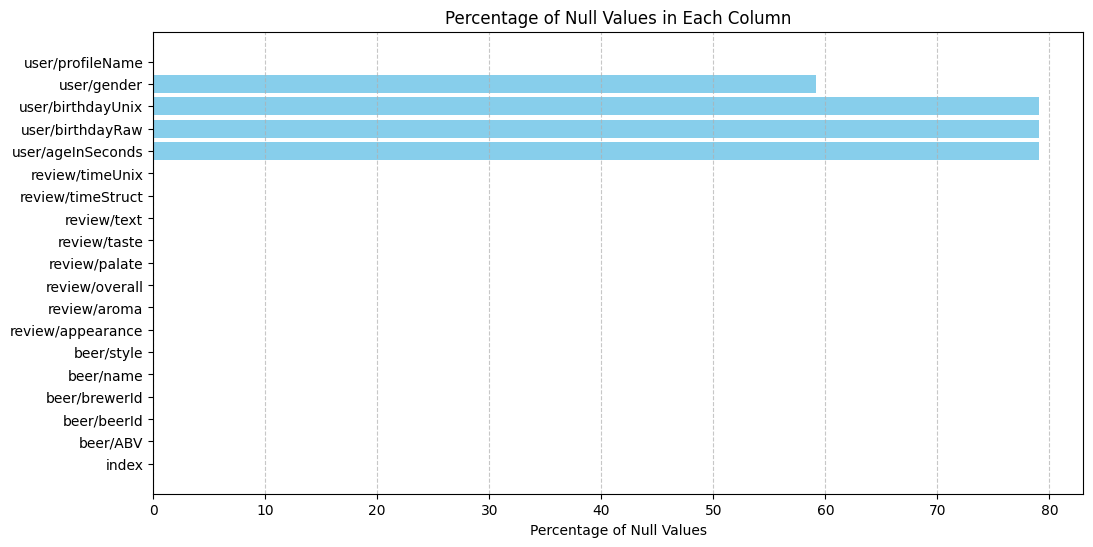

In [11]:
# calculate the percentage of null values for each column
null_percent = df.isnull().mean() * 100

# converted to DataFrame for better visualization
null_percent_df = null_percent.reset_index()
null_percent_df.columns = ['Column', 'Null_Percentage']


# Plotting the null percentage
plt.figure(figsize=(12, 6))
plt.barh(null_percent_df['Column'], null_percent_df['Null_Percentage'], color='skyblue')
plt.xlabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


* Its a Lots of null values in birthday and its related columns as well as in gender and age coilumns.
Using simple median or mode will create bias towards that value.
So further analysis will be helpful to how to handle them.

* Review text has only 10 null rows so drooped

In [12]:
df.dropna( subset = ['review/text'], inplace = True)

In [13]:
df.describe(include = 'all')

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,...,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
count,37490.000000,37490.000000,37490.000000,37490.000000,37490,...,7.856000e+03,7856,7.856000e+03,15308,37485
unique,NaN,NaN,NaN,NaN,1688,...,NaN,1432,NaN,2,7439
top,NaN,NaN,NaN,NaN,Founders Breakfast Stout,...,NaN,14-Sep-80,NaN,Male,northyorksammy
freq,NaN,NaN,NaN,NaN,1883,...,NaN,76,NaN,15063,141
mean,24951.998453,7.403336,21861.062497,3036.404268,NaN,...,1.176705e+09,NaN,2.416303e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
min,0.000000,0.100000,175.000000,1.000000,NaN,...,7.034366e+08,NaN,-2.208960e+09,NaN,NaN
25%,12421.500000,5.400000,5441.000000,395.000000,NaN,...,9.794810e+08,NaN,1.433628e+08,NaN,NaN
50%,24942.500000,6.900000,17538.000000,1199.000000,NaN,...,1.100009e+09,NaN,3.183264e+08,NaN,NaN
75%,37418.250000,9.400000,34146.000000,1315.000000,NaN,...,1.274973e+09,NaN,4.388544e+08,NaN,NaN


In [14]:
df.drop('index', axis = 1, inplace = True)

Index would not add value in our model and analysis so dropped

##Feature engineering 1

###1] Converting beare styles in smaller categories

In [15]:
import pandas as pd


# Mapping dictionary
style_mapping = {
    'Ale': ['Ale'],
    'Lager': ['Lager', 'Pilsener'],
    'Stout/Porter': ['Stout', 'Porter'],
    'IPA': ['IPA'],
    'Weizen/Wheat': ['Weizen', 'Wheat'],
    'Belgian': ['Dubbel', 'Tripel', 'Quadrupel', 'Belgian'],
    'Bock': ['Bock'],
    'Sour/Wild Ale': ['Lambic', 'Sour', 'Wild Ale'],
    'Specialty/Spiced': ['Herbed / Spiced Beer', 'Pumpkin Ale', 'Winter Warmer',
                         'Scottish Gruit / Ancient Herbed Ale', 'Rauchbier',
                         'Smoked Beer', 'Chile Beer', 'Braggot']
}

# Function to map styles based on the dictionary
def map_style(style):
    for category, keywords in style_mapping.items():
        if any(keyword in style for keyword in keywords):
            return category
    return 'Other'

# Apply the mapping function
df['style_category'] = df['beer/style'].apply(map_style)

# Display the first few rows to verify the result
print(df[['beer/style', 'style_category']].head())

# drop the beer style column
df.drop('beer/style', axis = 1, inplace = True)

                beer/style    style_category
0     Herbed / Spiced Beer  Specialty/Spiced
1      American Barleywine             Other
2  American Pale Ale (APA)               Ale
3           Czech Pilsener             Lager
4         English Pale Ale               Ale


###2] Converting Customer review in ordinal

Converted all reviews into range of 1 to 5 using NLTK Vader as its analyse the sentiments
VADER analyzes text sentiment by scoring it with a compound score that reflects overall sentiment intensity. This score is then mapped to a 1-5 scale to categorize reviews from "Very Negative" to "Very Positive."

In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon if not already done
nltk.download('vader_lexicon')


# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to map compound score to a 1-5 scale
def map_sentiment_to_scale(review_text):
    # Get the sentiment scores for the review
    sentiment_scores = sid.polarity_scores(review_text)
    compound_score = sentiment_scores['compound']

    # Map compound score to 1-5 scale
    if compound_score <= -0.6:
        return 1  # Very Negative (Bad)
    elif compound_score <= -0.2:
        return 2  # Negative
    elif compound_score <= 0.2:
        return 3  # Neutral
    elif compound_score <= 0.6:
        return 4  # Positive
    else:
        return 5  # Very Positive (Best)

# Apply the function to the 'review/text' column
df['review_sentiment'] = df['review/text'].apply(map_sentiment_to_scale)

# Display the first few rows to verify the result
print(df[['review/text', 'review_sentiment']].head())

df.drop('review/text', axis = 1, inplace = True)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                         review/text  review_sentiment
0  Pours a clouded gold with a thin white head. N...                 3
1  12oz bottle into 8oz snifter.\t\tDeep ruby red...                 5
2  First enjoyed at the brewpub about 2 years ago...                 5
3  First thing I noticed after pouring from green...                 5
4  A: pours an amber with a one finger head but o...                 5


In [17]:
# check classes after conversion
df['review_sentiment'].value_counts()

,count
review_sentiment,
5,31664
4,2582
3,1254
2,1023
1,967


###3] convert time unix

In [18]:
# Convert 'review/timeUnix' to datetime format
df['review_time'] = pd.to_datetime(df['review/timeUnix'], unit='s')

# Display the first few rows to verify the conversion
print(df[['review/timeUnix', 'review_time']].head())



   review/timeUnix         review_time
0       1229398690 2008-12-16 03:38:10
1       1218238738 2008-08-08 23:38:58
2       1101492422 2004-11-26 18:07:02
3       1308532025 2011-06-20 01:07:05
4       1299912708 2011-03-12 06:51:48


In [19]:
df['review_time'] = pd.to_datetime(df['review_time'])

In [20]:
df['day'] = df['review_time'].dt.day
df['month'] = df['review_time'].dt.month
df['year'] = df['review_time'].dt.year
df['hour'] = df['review_time'].dt.hour

In [21]:
# drop the old columns
df.drop(columns = ['review/timeUnix','review_time'], axis= 1, inplace = True)

In [22]:
# review time and time struct having same data so time struck dropped
df[['day','month','year','hour','review/timeStruct']].head()



,day,month,year,hour,review/timeStruct
0,16,12,2008,3,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ..."
1,8,8,2008,23,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ..."
2,26,11,2004,18,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '..."
3,20,6,2011,1,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y..."
4,12,3,2011,6,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ..."


In [23]:
df.drop('review/timeStruct', axis = 1, inplace = True)

###4] Converting age in years and as well as Null value imputation using Analysis

* Before converting I'm going to analysing that if there is any relationship betn the beer type and the age.
* If I found[kl' any relation then I can fill na by the beer type.
* For eg if I got that age group of 25 to 30 buys "Ale" type beer more than any age groups then I easily fill as if beer category is Ale then age between randoom(25,30)

* First convert age inseconds to age in years

In [24]:
df['user/ageInSeconds'].fillna(0, inplace=True)

df['user/ageInYears'] = df['user/ageInSeconds'] / 31536000

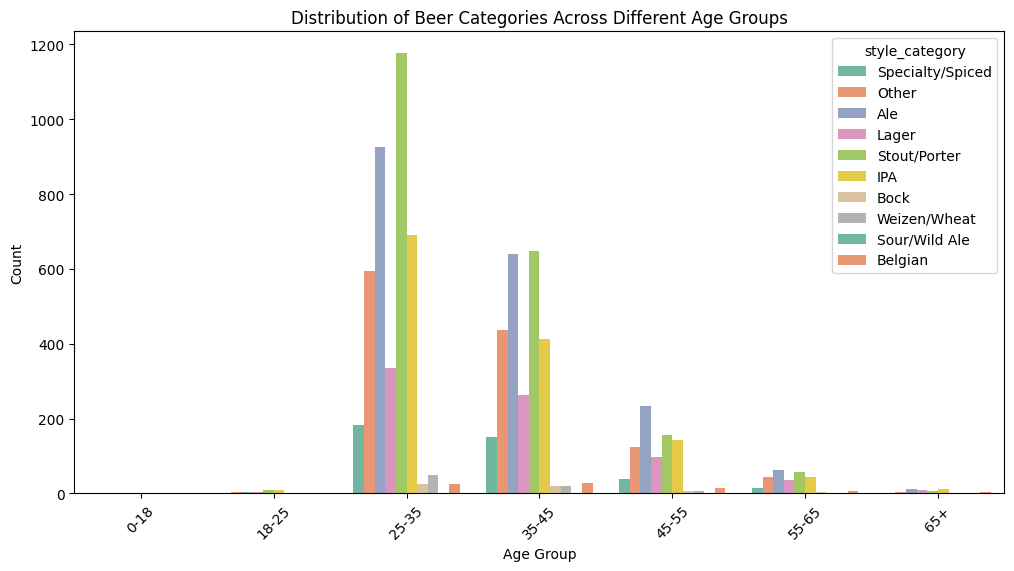

<ipython-input-25-faee1696aca0>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_style_counts = df_analysis.groupby(['age_group', 'style_category']).size().unstack(fill_value=0)


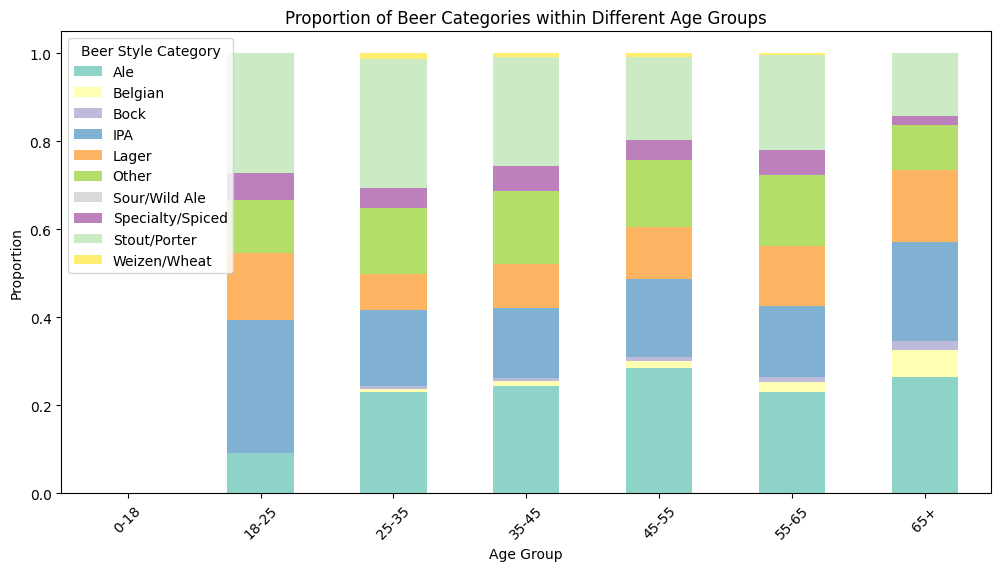

<ipython-input-25-faee1696aca0>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='style_category', y='user/ageInYears', data=df_analysis, palette='Set1')


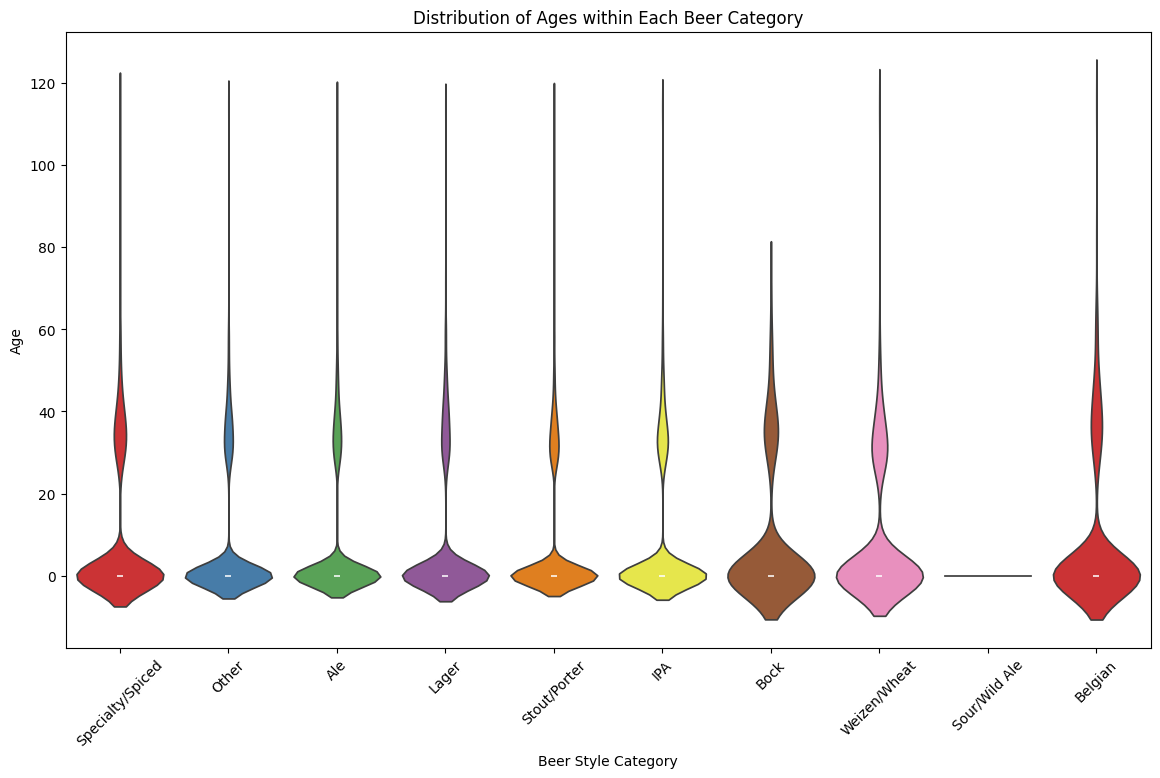

In [25]:
# created new df of no null of ages for analysing purpose
df_analysis = df[ ~ df['user/ageInYears'].isna()]

# Discretize age into bins for better visualization
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]  # Define age bins
age_labels = ['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
df_analysis['age_group'] = pd.cut(df_analysis['user/ageInYears'], bins=age_bins, labels=age_labels)

# Plot 1: Count plot to show the distribution of beer categories across different age groups
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='style_category', data=df_analysis, palette='Set2')
plt.title('Distribution of Beer Categories Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Stacked bar plot to show proportion of each beer category within different age groups
age_style_counts = df_analysis.groupby(['age_group', 'style_category']).size().unstack(fill_value=0)
age_style_counts = age_style_counts.div(age_style_counts.sum(axis=1), axis=0)

age_style_counts.plot(kind='bar', stacked=True, colormap='Set3', figsize=(12, 6))
plt.title('Proportion of Beer Categories within Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Beer Style Category')
plt.show()

# Plot 3: Violin Plot to display the distribution of ages within each beer category
plt.figure(figsize=(14, 8))
sns.violinplot(x='style_category', y='user/ageInYears', data=df_analysis, palette='Set1')
plt.title('Distribution of Ages within Each Beer Category')
plt.xlabel('Beer Style Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


As per above visualizations I didnt found any patterns to apply my logic. So I'm going to drop those features.

###5] Beer name - Thinking!!! - It has 1688 unique value and could possible in cardinality and sparcity, also as we have beer style category then droping beer name for ML algorithm is a better choice to prevent overfitting issue.
Also if i do one hot encode (as its not ordinal) then it will be curse of dimensionality so going to drop.

In [26]:
df['beer/name'].value_counts()

,count
beer/name,
Founders Breakfast Stout,1883
Founders KBS (Kentucky Breakfast Stout),1439
Founders Centennial IPA,1063
Founders Red's Rye PA,1051
Founders Dirty Bastard,983
...,...
Bluffdiver IPA,1
Montgomery Mild,1
Willy's Crown Jewels,1


###6] Get the idea as whcih beer styles are famous among gendres. If theres a pattern it will help to Null value imputation for gender

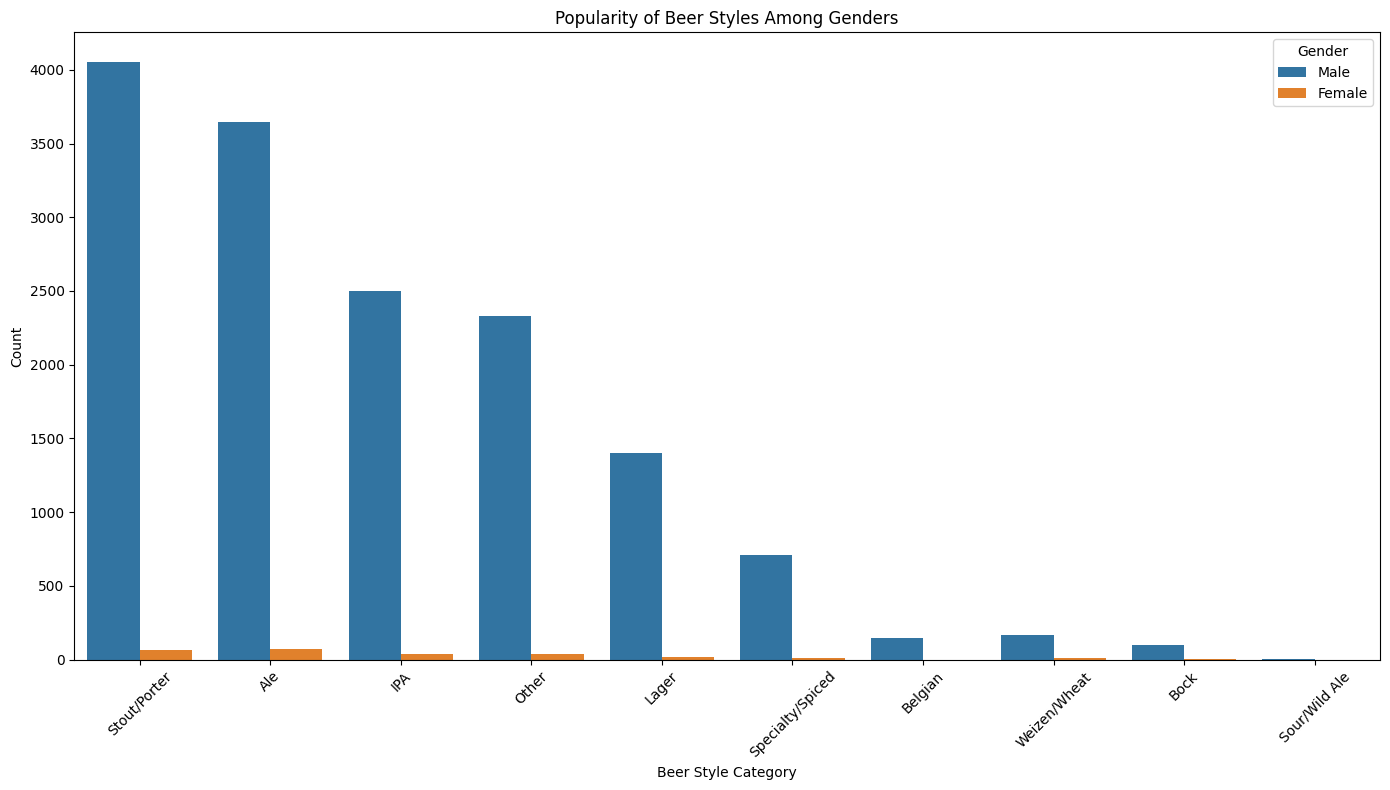

In [27]:
plt.figure(figsize=(14, 8))

# create a count plot to show the distribution of beer styles among genders
sns.countplot(data=df, x='style_category', hue='user/gender', order=df['style_category'].value_counts().index)

plt.title('Popularity of Beer Styles Among Genders')
plt.xlabel('Beer Style Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


* As per above, there no any pattern that will give an idea which beer style is famous among Female / Male.
* So filling gender by median will create Bias towards the gender so Im dropping it as It has 59% of null values.

##EDA

* A] Beer Id - It has 1731 and bewer Id  has 212 unique values. So one hot encoding could raise in High dimensional as well as overfitting issues.
If I kept as it is then model will learn as the higher values will be high weight and high influence on prediction, so I chosen to remove it.


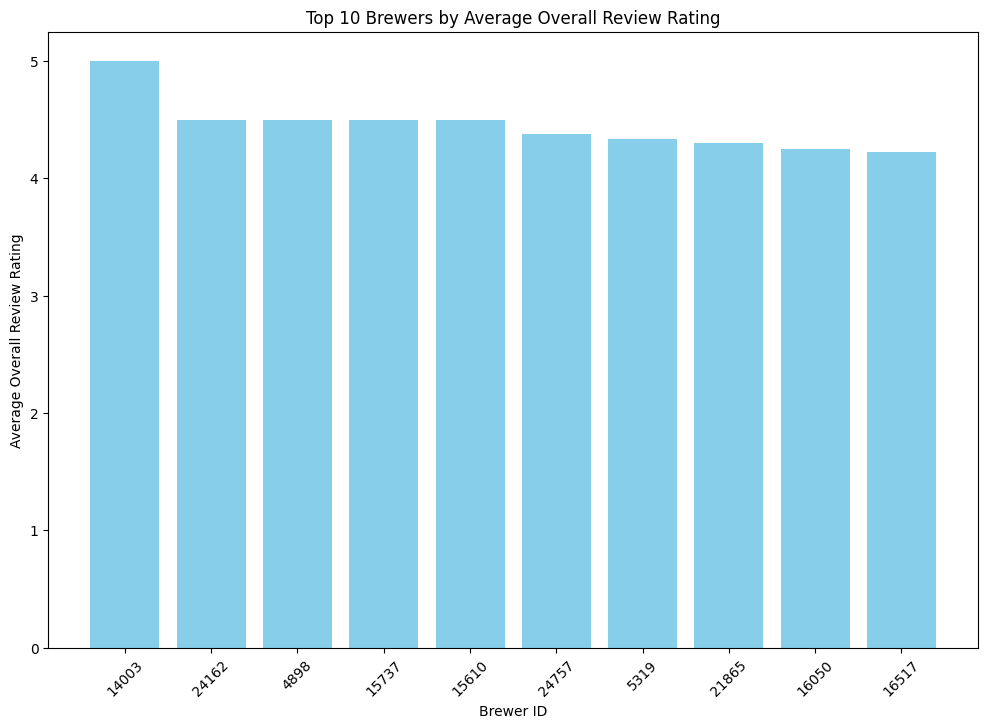

In [28]:
import pandas as pd

# Step 1: Group by 'beer/brewerId' and calculate the average 'review/overall'
brewer_avg_review = df.groupby('beer/brewerId')['review/overall'].mean().reset_index()

# Step 2: Sort the averages in descending order
brewer_avg_review_sorted = brewer_avg_review.sort_values(by='review/overall', ascending=False)

# Step 3: Visualize the top N brewers (e.g., top 10) using a bar plot
top_n = 10  # Change this value to plot more or fewer brewers
plt.figure(figsize=(12, 8))
plt.bar(brewer_avg_review_sorted['beer/brewerId'].head(top_n).astype(str), brewer_avg_review_sorted['review/overall'].head(top_n), color='skyblue')
plt.title('Top {} Brewers by Average Overall Review Rating'.format(top_n))
plt.xlabel('Brewer ID')
plt.ylabel('Average Overall Review Rating')
plt.xticks(rotation=45)
plt.show()


###1] Univariate Analysis - Check distribution of the data

In [29]:
categorical_columns = ['review/aroma','review/overall','review/palate','review/taste','day','month','year','style_category','user/gender']
numeric_columns = ['review/overall']

In [30]:
df['review/overall'].value_counts()

,count
review/overall,
4.0,13867
4.5,8662
3.5,6550
3.0,3319
5.0,2667
2.5,1193
2.0,807
1.5,248
1.0,176


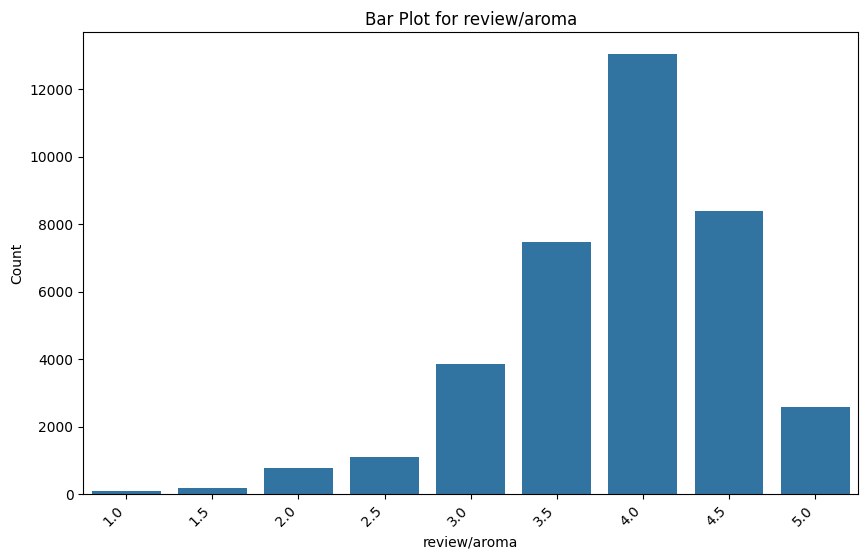

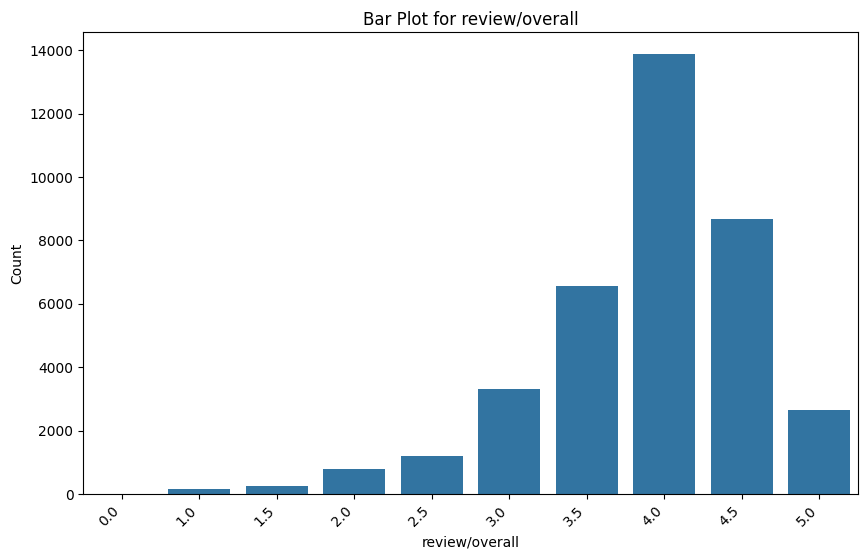

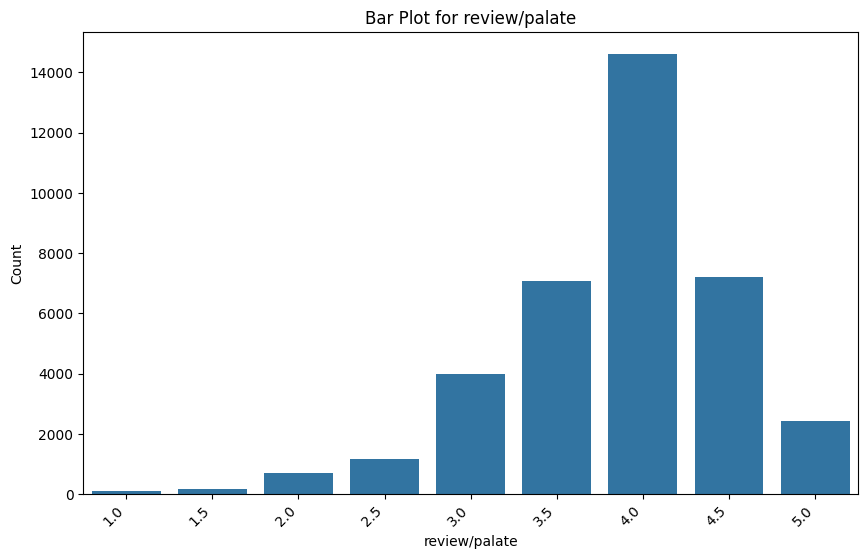

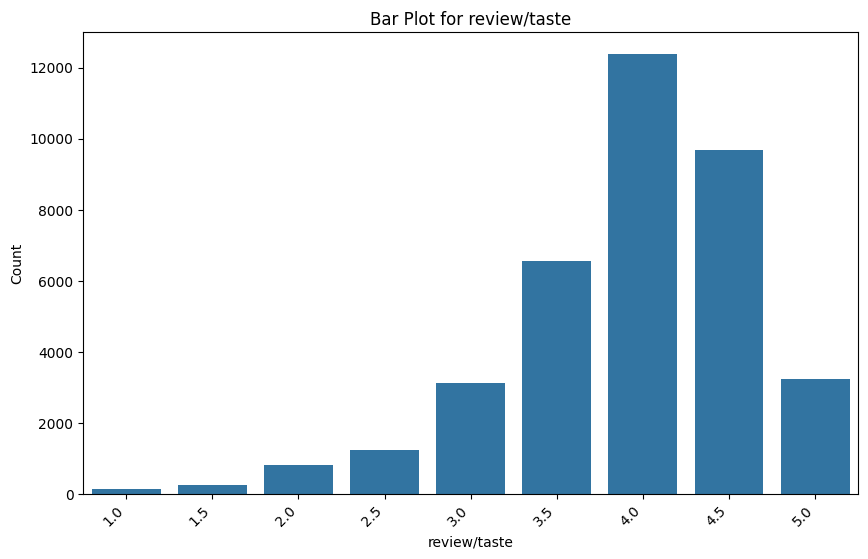

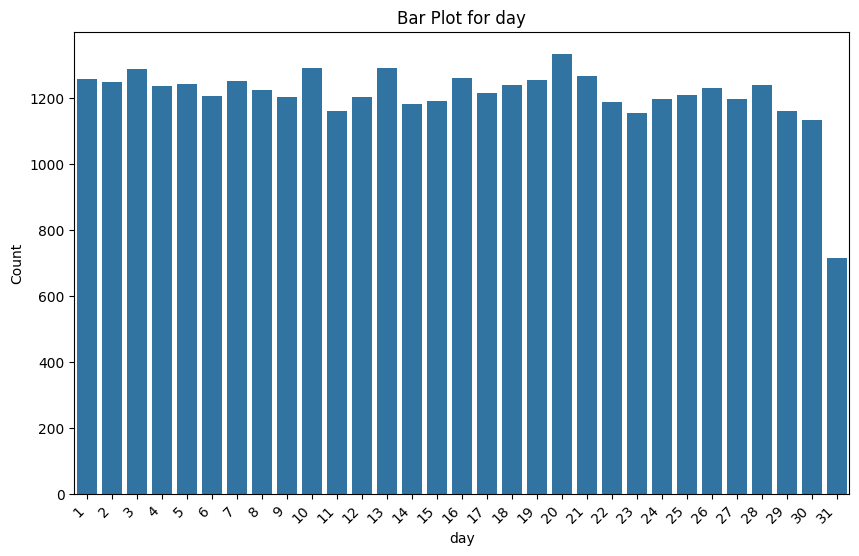

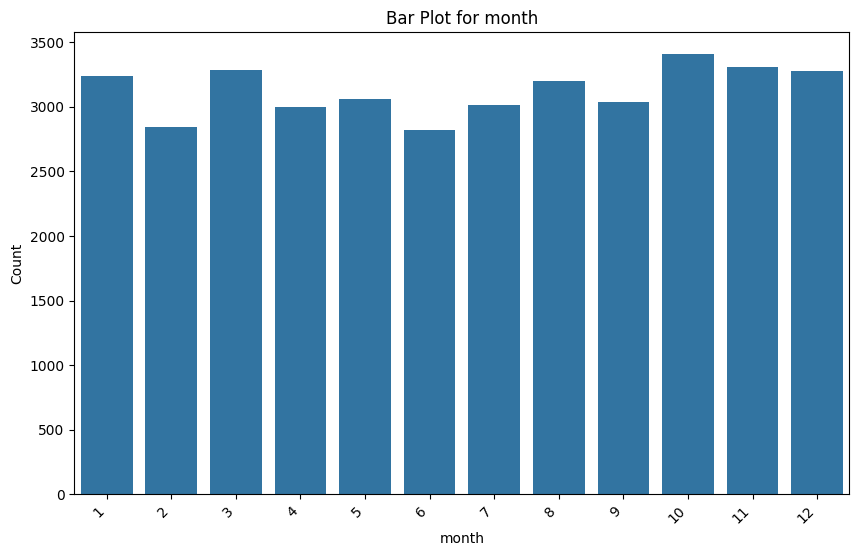

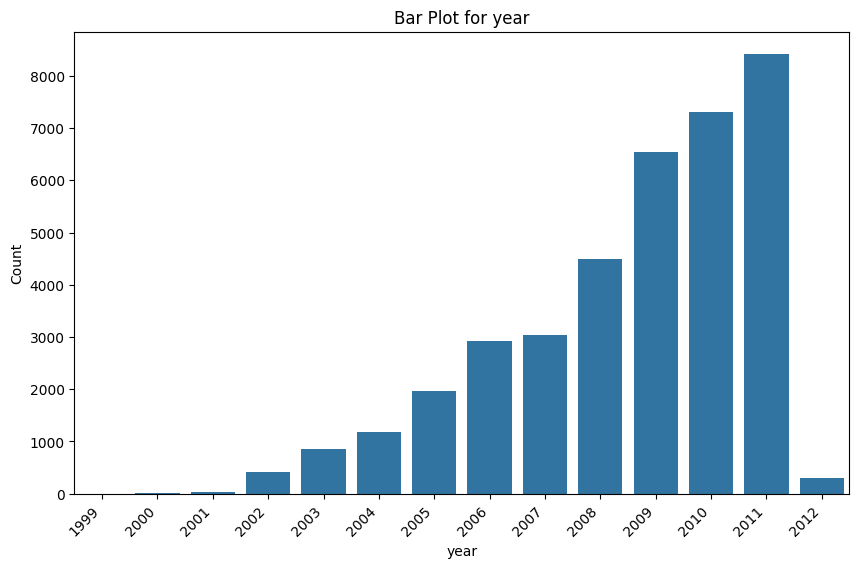

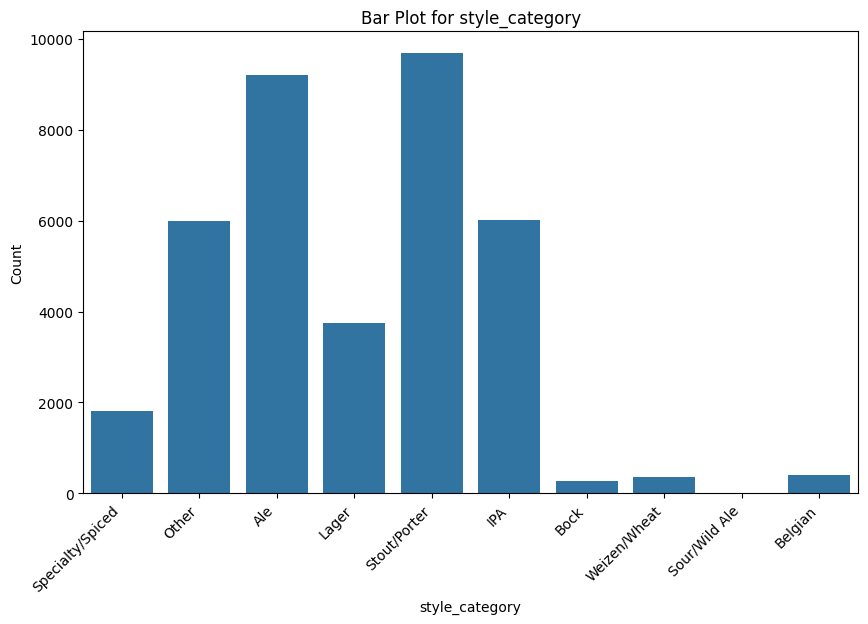

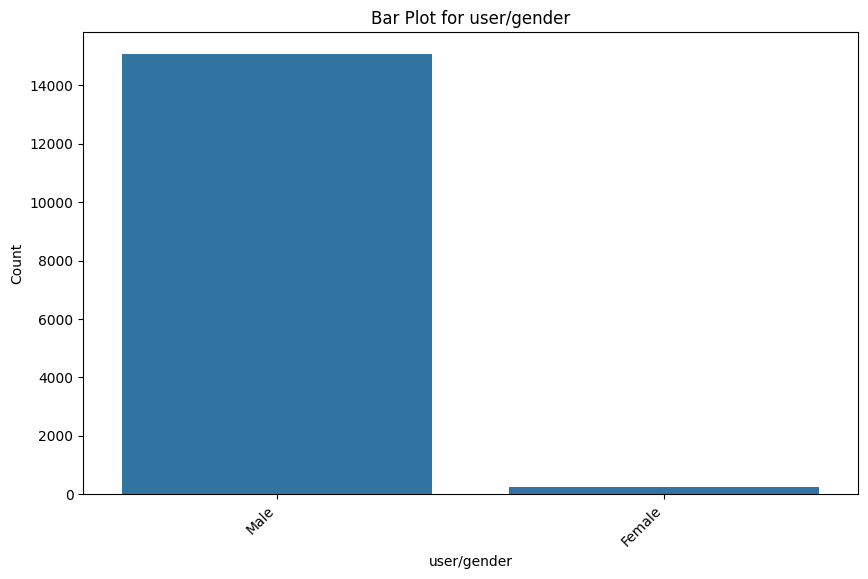

In [31]:
def plot_categorical_columns(df):

    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=column)
        plt.title(f'Bar Plot for {column}')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

# Call the function to plot bar plots for all categorical columns
plot_categorical_columns(df)


Observations -
* Most sold Beer categories are Ale and stout/ porter.
* Beer sale increasing gradually from the 2001 to 2012, even 2008 economic crisis also not affected this, this shows peoples need to this and continuous growth in purchasing power.
* All the reviews are having average of 4 that shows the quality of the products.
* Gender differnce is shown in purchasing due to lack of the data (High null values)
* Theres no pattern found in months and hour on beer sale

##2] Bivariate Analysis

<ipython-input-32-8a51736dfd0c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='style_category', y='review/overall', data=average_ratings_sorted, palette='viridis')


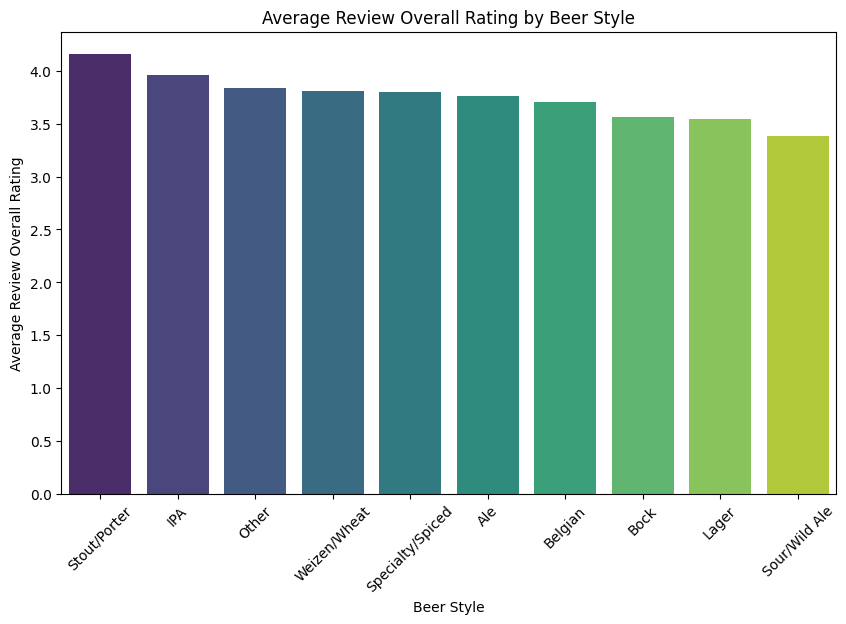

In [32]:
# Calculate the average review/overall rating for each style
average_ratings = df.groupby('style_category')['review/overall'].mean().reset_index()

# Sort by average rating in descending order
average_ratings_sorted = average_ratings.sort_values(by='review/overall', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='style_category', y='review/overall', data=average_ratings_sorted, palette='viridis')
plt.title('Average Review Overall Rating by Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Average Review Overall Rating')
plt.xticks(rotation=45)
plt.show()


Most rated beer is Stout / porter and least is sour / wild ale shows the chnaces of improvement.

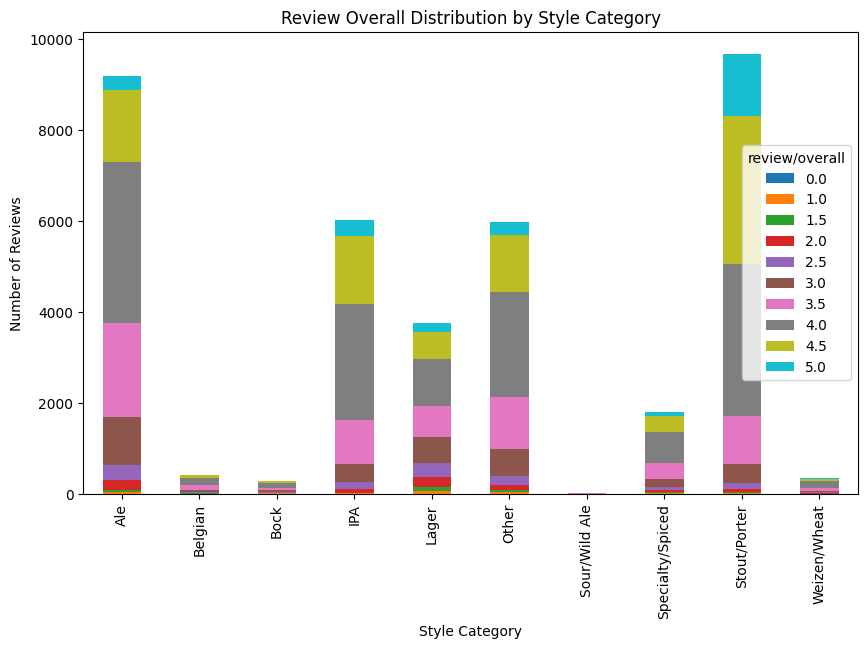

In [33]:
# Create a stacked bar plot
df_grouped = df.groupby(['style_category', 'review/overall']).size().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Review Overall Distribution by Style Category')
plt.xlabel('Style Category')
plt.ylabel('Number of Reviews')
plt.show()


Almost all beers has avg rating of 4 which shows the quality of the beers.

2] Check Top 10 Users by review counts

In [34]:
# Count the number of reviews per user profile
profile_counts = df['user/profileName'].value_counts().reset_index()

# Get the top ten user profiles by number of reviews
top_ten_profiles = profile_counts.head(10)

# Display the results
print(top_ten_profiles)


  user/profileName  count
0   northyorksammy    141
1    BuckeyeNation    110
2      mikesgroove     92
3     ChainGangGuy     84
4        MasterSki     83
5          akorsak     81
6           oberon     81
7  barleywinefiend     80
8        Thorpe429     79
9           smcolw     74


##Feature Engineering

###**1] rounding the floats of review overall to integers for Classification Task**

In [35]:
# Custom function to map 'review/overall' to specific integer classes
def convert_review_overall(df, column_name):
    # Define a mapping based on the provided logic
    mapping = {
        0.0: 1,
        1.0: 1,
        1.5: 2,
        2.0: 2,
        2.5: 3,
        3.0: 3,
        3.5: 4,
        4.0: 4,
        4.5: 5,
        5.0: 5
    }

    # Map the values in the specified column
    df[column_name] = df[column_name].map(mapping).astype(int)

# Apply the function to your dataframe
convert_review_overall(df, 'review/overall')

# Display the updated dataframe to verify
print(df['review/overall'].value_counts())


review/overall
4    20417
5    11329
3     4512
2     1055
1      177
Name: count, dtype: int64


As per my analysis I colncluded to drop this columns:

* 1] Age related columns as beer/beerId ,beer/brewerId, beer/name, beer/style, review/text

* 2] Drpping this as both have same data -
    a] review/timeStruct, review/timeUnix - As i extracted month, day, year, hour from it
    b] user/ageInSeconds, user/birthdayRaw, user/birthdayUnix, user/ageInYears due to High bull and filling null with mdeian will be bias so dropping it.

* 3] As per visuals I didnt got any relevent info so I'm going to drop user/gender after some visualizations.

* 4] user/profileName has 7440 uniques so I will drop after some analysis as its not helpful to make Ml algorithm

* 5] As i converted all beer styles into smaller categories as 'style_category' so going to drop it.

* 6] I converted 'review\text' into review_sentiment in 1 to 5 ratings as per the sentimens so going to drop it.


In [36]:
df.drop(columns = ['beer/beerId','beer/brewerId','beer/name',
        'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'], axis = 1, inplace = True)

In [37]:
df.columns

Index(['beer/ABV', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'style_category', 'review_sentiment',
       'day', 'month', 'year', 'hour', 'user/ageInYears'],
      dtype='object')

In [38]:
df.drop('user/ageInYears', axis = 1, inplace = True)

In [39]:
df['style_category'].value_counts()

,count
style_category,
Stout/Porter,9682
Ale,9199
IPA,6015
Other,5989
Lager,3756
Specialty/Spiced,1802
Belgian,407
Weizen/Wheat,352
Bock,275


After One Hot encoding we should have to drop 1 feature to avoid multicolinearity. As we saw 'Sour/Wild Ale' has only 13 Rows of data so I decided to drop that feature after One Hot encoding

###**2] One Hot encoding on style category**

In [40]:
# One-hot encode the 'beer/style' column
df = pd.get_dummies(df, columns=['style_category'], prefix='style')

# Display the updated DataFrame
print(df)

       beer/ABV  review/appearance  review/aroma  review/overall  \
0          5.00                4.0           4.0               4   
1         11.00                4.0           3.5               4   
2          4.70                3.5           4.0               4   
3          4.40                3.0           3.0               3   
4          4.40                4.0           3.0               3   
...         ...                ...           ...             ...   
37495      5.50                4.0           3.5               4   
37496      8.50                4.5           4.0               4   
37497      4.75                4.0           3.5               4   
37498     11.20                4.0           4.0               4   
37499      8.50                4.0           4.0               4   

       review/palate  ...  style_Other  style_Sour/Wild Ale  \
0                4.0  ...        False                False   
1                3.5  ...         True                Fal

In [41]:
# List of boolean columns created from one-hot encoding
boolean_columns = ['style_Ale', 'style_Belgian', 'style_Bock', 'style_IPA',
                   'style_Lager', 'style_Other', 'style_Sour/Wild Ale',
                   'style_Specialty/Spiced', 'style_Stout/Porter',
                   'style_Weizen/Wheat']

# Convert all boolean columns to binary (0 and 1)
df[boolean_columns] = df[boolean_columns].astype(int)

# Display the first few rows to verify the result
print(df[boolean_columns].head())


   style_Ale  style_Belgian  style_Bock  style_IPA  style_Lager  style_Other  \
0          0              0           0          0            0            0   
1          0              0           0          0            0            1   
2          1              0           0          0            0            0   
3          0              0           0          0            1            0   
4          1              0           0          0            0            0   

   style_Sour/Wild Ale  style_Specialty/Spiced  style_Stout/Porter  \
0                    0                       1                   0   
1                    0                       0                   0   
2                    0                       0                   0   
3                    0                       0                   0   
4                    0                       0                   0   

   style_Weizen/Wheat  
0                   0  
1                   0  
2                   0  
3 

In [42]:
df.drop('style_Sour/Wild Ale', axis = 1, inplace = True)

As wild ale has least datapoints (13)

##3] Multivariate analysis

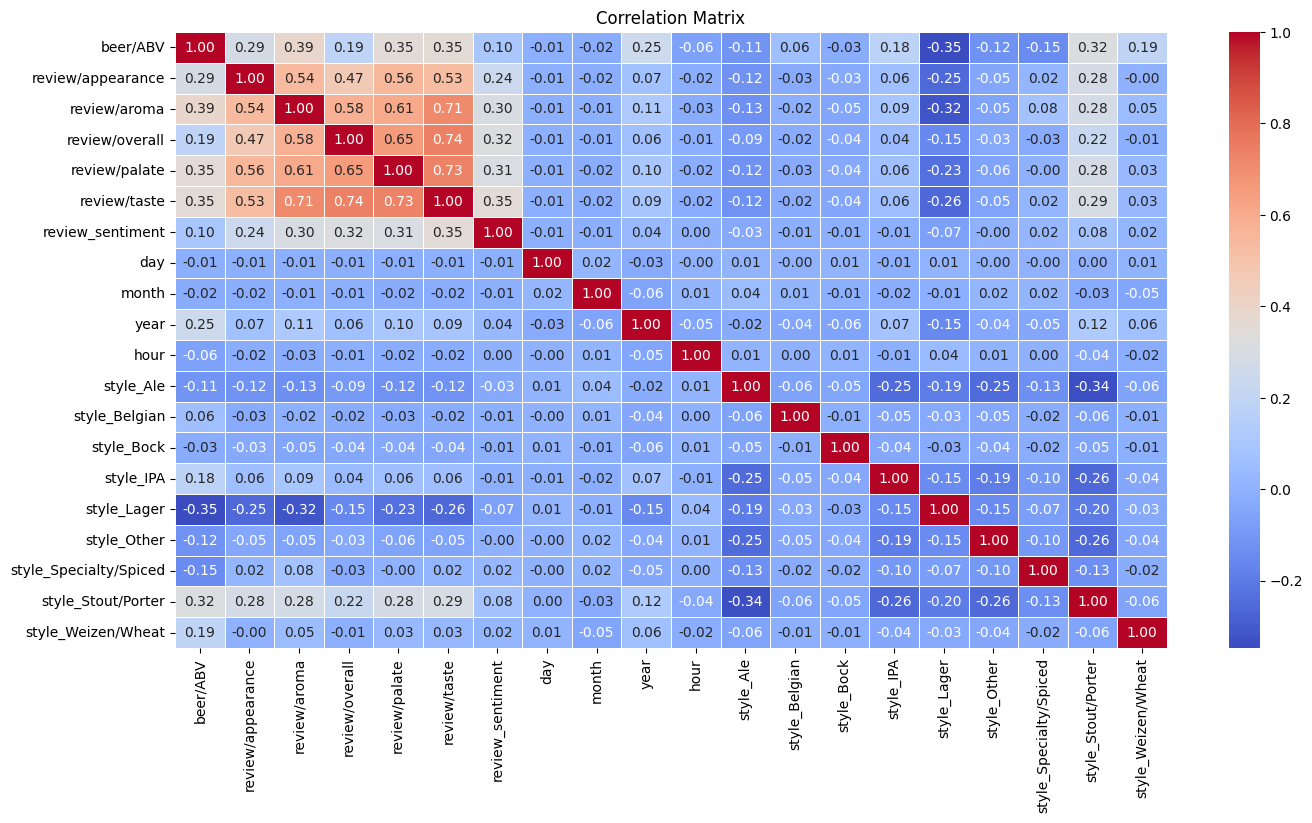

In [43]:
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


There's some multicollinearity betn review test and review palate and review aroma I'm going to aavg the both columns

In [44]:
df['palate_aroma_review'] = ((df['review/palate'] + df['review/aroma']) / 2).round()

In [45]:
df.drop( columns = ['review/palate','review/aroma'], axis = 1, inplace = True)

##Modeling -

###**1] Check final datatypes of features**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37490 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   beer/ABV                37490 non-null  float64
 1   review/appearance       37490 non-null  float64
 2   review/overall          37490 non-null  int64  
 3   review/taste            37490 non-null  float64
 4   review_sentiment        37490 non-null  int64  
 5   day                     37490 non-null  int32  
 6   month                   37490 non-null  int32  
 7   year                    37490 non-null  int32  
 8   hour                    37490 non-null  int32  
 9   style_Ale               37490 non-null  int64  
 10  style_Belgian           37490 non-null  int64  
 11  style_Bock              37490 non-null  int64  
 12  style_IPA               37490 non-null  int64  
 13  style_Lager             37490 non-null  int64  
 14  style_Other             37490 non-null  int

###**2] split the data in train test data**

In [47]:
from sklearn.model_selection import train_test_split

# Define the target variable
y = df['review/overall']

# Define the feature matrix by dropping the target column
X = df.drop(columns=['review/overall'])

# Split the data into training and testing sets (80-20 split) as well maintained class balance using stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (29992, 18)
X_test shape: (7498, 18)
y_train shape: (29992,)
y_test shape: (7498,)


our dataset has imbalance inits classes so applied smote

###**3] Applying SMOTE as it has categorical imbalance**

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Display the shapes of the resulting datasets
print('Before SMOTE')
print(f"Original X_train shape: {X_train.shape}")
print(f"Original y_train distribution:\n{y_train.value_counts()}")
print('\nAfter SMOTE')
print(f"Resampled X_train shape: {X_train_smote.shape}")
print(f"Resampled y_train distribution:\n{y_train_smote.value_counts()}")


Before SMOTE
Original X_train shape: (29992, 18)
Original y_train distribution:
review/overall
4    16333
5     9063
3     3610
2      844
1      142
Name: count, dtype: int64

After SMOTE
Resampled X_train shape: (81665, 18)
Resampled y_train distribution:
review/overall
4    16333
5    16333
1    16333
3    16333
2    16333
Name: count, dtype: int64


###**4] normalizae the data using standard scaling which will enhance convergence faster**

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

###**5] Try PCA to get best performance**

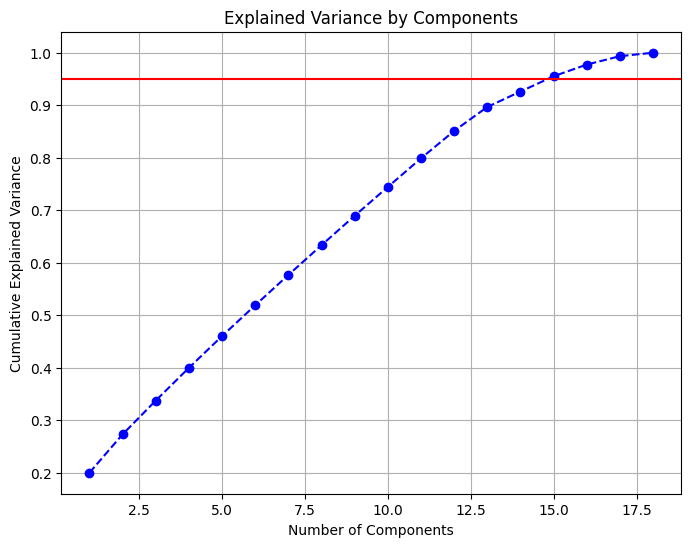

--------------------------------------------------
Optimal number of components for 0.95 variance threshold is 15
Cumulative explained variance by 15 components: 0.96


In [50]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Initialize PCA and find the optimal number of components
def find_best_n_components(X_train_scaled, variance_threshold=0.95):
    pca = PCA()
    pca.fit(X_train_scaled)
    cumsum = np.cumsum(pca.explained_variance_ratio_)

    # Find the number of components required to explain the desired variance
    num_components = int(np.argmax(cumsum >= variance_threshold) + 1)  # Ensure num_components is an integer

    # Plot the explained variance
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(1, len(cumsum) + 1), cumsum, marker='o', linestyle='--', color='b')
    plt.axhline(y=variance_threshold, color='r', linestyle='-')
    plt.title('Explained Variance by Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

    return num_components

variance_threshold = 0.95
# Get the optimal number of components
n_components = find_best_n_components(X_train_scaled)
print('-' * 50)
print(f"Optimal number of components for {variance_threshold} variance threshold is {n_components}")

# Apply PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display the cumulative variance explained by the selected components
explained_variance = np.sum(pca.explained_variance_ratio_)

print(f"Cumulative explained variance by {n_components} components: {explained_variance:.2f}")


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

Training LogisticRegression...
Train Accuracy: 0.6249
Train Precision: 0.6235
Train F1 Score: 0.6241
Test Accuracy: 0.6155
Test Precision: 0.6452
Test F1 Score: 0.6182

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.27      0.69      0.39        35
           2       0.42      0.45      0.43       211
           3       0.47      0.58      0.52       902
           4       0.75      0.56      0.64      4084
           5       0.56      0.75      0.64      2266

    accuracy                           0.62      7498
   macro avg       0.49      0.60      0.52      7498
weighted avg       0.65      0.62      0.62      7498



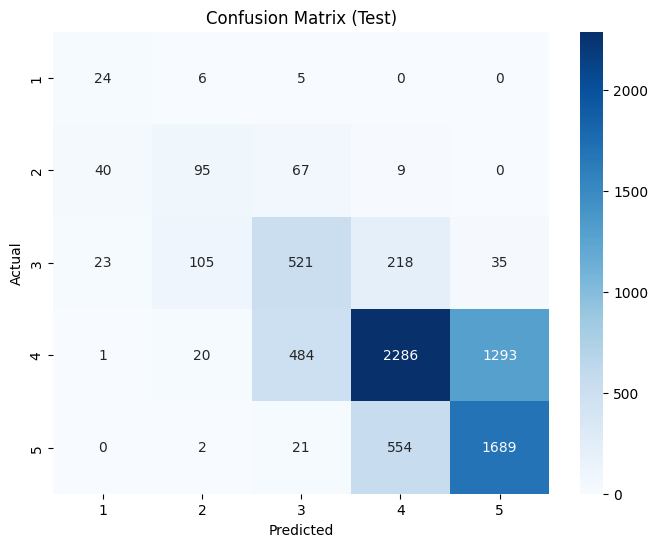

----------------------------------------------------------------------------------------------------

Training RandomForestClassifier...
Train Accuracy: 0.9999
Train Precision: 0.9999
Train F1 Score: 0.9999
Test Accuracy: 0.6434
Test Precision: 0.6387
Test F1 Score: 0.6403

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.07      0.03      0.04        35
           2       0.42      0.41      0.41       211
           3       0.50      0.48      0.49       902
           4       0.69      0.74      0.71      4084
           5       0.62      0.57      0.60      2266

    accuracy                           0.64      7498
   macro avg       0.46      0.45      0.45      7498
weighted avg       0.64      0.64      0.64      7498



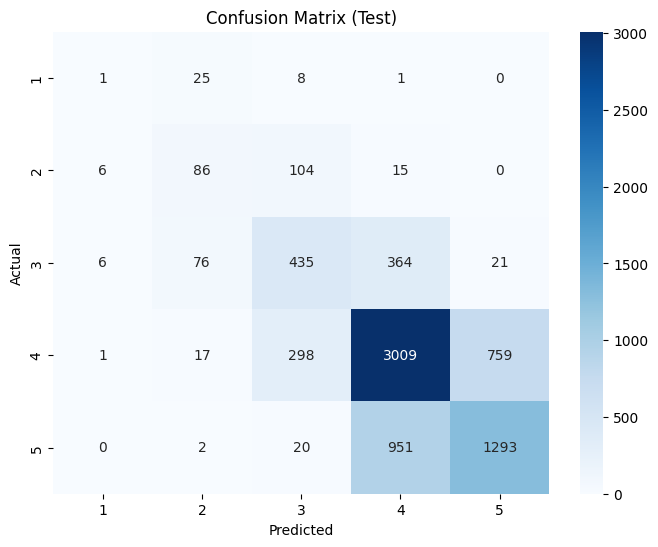

----------------------------------------------------------------------------------------------------

Training SVC...
Train Accuracy: 0.7486
Train Precision: 0.7518
Train F1 Score: 0.7485
Test Accuracy: 0.6674
Test Precision: 0.6663
Test F1 Score: 0.6660

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.36      0.37      0.37        35
           2       0.44      0.56      0.49       211
           3       0.53      0.49      0.51       902
           4       0.71      0.75      0.73      4084
           5       0.66      0.61      0.63      2266

    accuracy                           0.67      7498
   macro avg       0.54      0.56      0.55      7498
weighted avg       0.67      0.67      0.67      7498



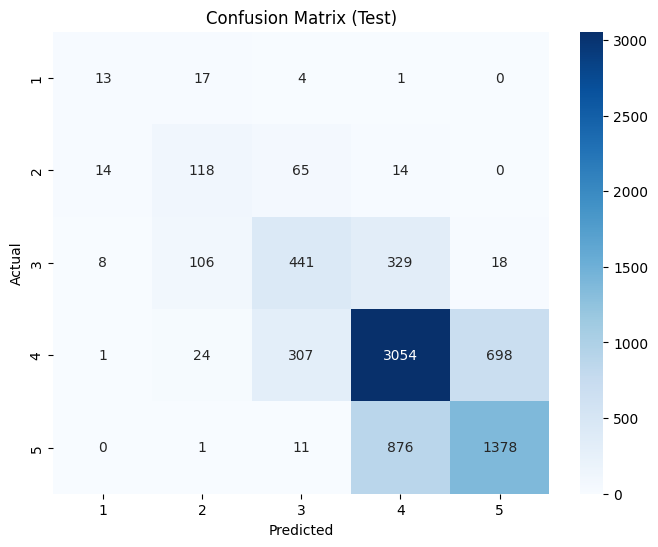

----------------------------------------------------------------------------------------------------

Training KNeighborsClassifier...
Train Accuracy: 0.8834
Train Precision: 0.8814
Train F1 Score: 0.8821
Test Accuracy: 0.5686
Test Precision: 0.5800
Test F1 Score: 0.5732

Classification Report (Test):
              precision    recall  f1-score   support

           1       0.15      0.14      0.14        35
           2       0.29      0.43      0.35       211
           3       0.36      0.42      0.38       902
           4       0.66      0.62      0.64      4084
           5       0.55      0.55      0.55      2266

    accuracy                           0.57      7498
   macro avg       0.40      0.43      0.41      7498
weighted avg       0.58      0.57      0.57      7498



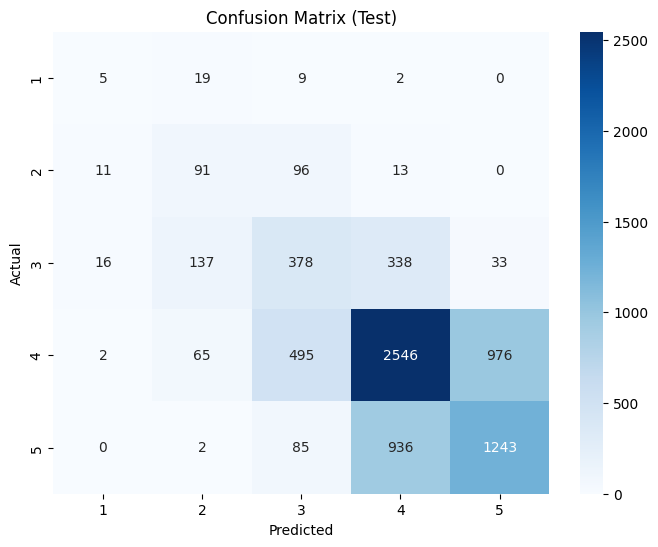

----------------------------------------------------------------------------------------------------



In [52]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_simple_model(X_train, y_train, X_test, y_test, model):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on both train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {}

    # Train metrics
    metrics['Train Accuracy'] = accuracy_score(y_train, y_train_pred)
    metrics['Train Precision'] = precision_score(y_train, y_train_pred, average='weighted')
    metrics['Train F1 Score'] = f1_score(y_train, y_train_pred, average='weighted')

    # Test metrics
    metrics['Test Accuracy'] = accuracy_score(y_test, y_test_pred)
    metrics['Test Precision'] = precision_score(y_test, y_test_pred, average='weighted')
    metrics['Test F1 Score'] = f1_score(y_test, y_test_pred, average='weighted')

    # Print metrics
    print(f"Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"Train Precision: {metrics['Train Precision']:.4f}")
    print(f"Train F1 Score: {metrics['Train F1 Score']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"Test Precision: {metrics['Test Precision']:.4f}")
    print(f"Test F1 Score: {metrics['Test F1 Score']:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    # Plot confusion matrix for test set
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Determine unique labels in y_test and y_test_pred
    unique_labels = np.unique(np.concatenate((y_test, y_test_pred)))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=unique_labels,
                yticklabels=unique_labels)
    plt.title('Confusion Matrix (Test)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print('-' * 100)
    print()

    return model


# Initialize models
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Apply function for each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    trained_model = train_and_evaluate_simple_model(X_train_pca, y_train_smote, X_test_pca, y_test, model)


* Among all the models logistic regression gave almost similar accuracy for train and test shows balance fit of the model.

* Due to time limitations i Didnt trained using grid search hyperparamerter tuning and thats why al models are misclassifying. If we do then accuracy will improve.

###Best Features

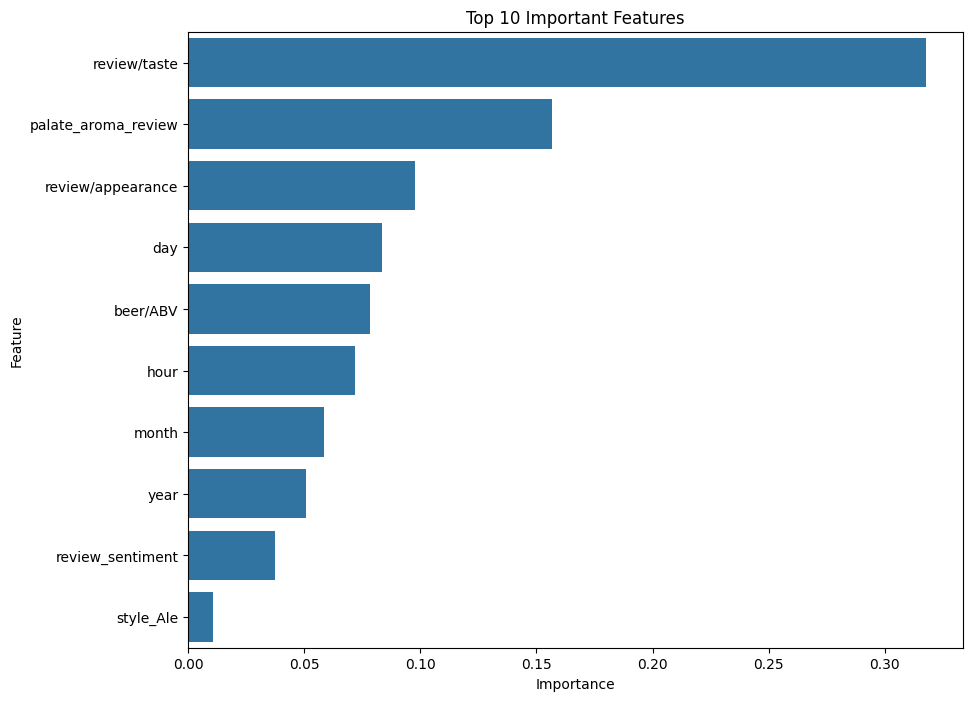

                Feature  Importance
2          review/taste    0.317815
17  palate_aroma_review    0.156640
1     review/appearance    0.097716
4                   day    0.083448
0              beer/ABV    0.078513
7                  hour    0.071826
5                 month    0.058358
6                  year    0.050897
3      review_sentiment    0.037312
8             style_Ale    0.010693


In [55]:

# Train a simple RandomForest model to get feature importances
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_smote)

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.show()

# Display top features
print(feature_importance_df.head(10))

* Combining Random Forest with SHAP provides a robust approach to feature importance because Random Forest offers an initial, ensemble-based feature ranking, while SHAP explains the impact of each feature on the model's predictions, ensuring both a broad understanding of feature relevance and detailed, interpretable insights into individual predictions. This combination helps improve model transparency and trustworthiness.

#**My approach -**

1] I checked the categories and target variable and found that it has float and interger but in steps of 0.5. so instead regression i converted them into integers and applied clasification algorithm.

2] For null value imputation in age, gender like features median will be add bias towards it due to High null values so my logic was find the relationship betn ay category whcih leaned towrdds any age or gender that means if the category is x then null gender with z

3] I analysed that review time unix and time strut having same values in diff format so i choosed time unix converted into it in time date format and extarcted year, month, day and remoed time unix and time strut

4] I found that theres too huge class imbalance in dependent variable so choose SMOTE balance the data

5] In model building I tried before and after pca and found pca worked well

6] Itried Random forest, logistic regression, KNN and support vector classifiers with grid search, but it tooks huge amount of time on traing and Iterating the paramertrs for grid search so finally i trained models with no parameters due to time limitations.

##Models I used with hyperparametres but take almost 1.5 hr for train and experimenting on parametres so not used due to time limitations.

In [ ]:
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# # Define the models and their respective hyperparameter grids
# models = {
#     'KNeighborsClassifier': {
#         'model': KNeighborsClassifier(),
#         'param_grid': {
#             'n_neighbors': [3, 5, 7],
#             'weights': ['distance']
#         }
#     },
#     'RandomForestClassifier': {
#         'model': RandomForestClassifier(),
#         'param_grid': {
#             'n_estimators': [50,75,100],
#             'max_depth': [3, 7, 9],
#             'min_samples_split': [3,5,7]
#         }
#     },
#     'GradientBoostingClassifier': {
#         'model': GradientBoostingClassifier(),
#         'param_grid': {
#             'n_estimators': [50,75,100],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 5, 7]
#         }
#     }
# }